In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt

# Data collection and processing

In [3]:
# loading the data from csv file
car_dataset = pd.read_csv("/content/car data.csv")

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
# geting infor
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Checking number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# Checking distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the Categorical Data


In [11]:
# encoding "Fuel_Type" column
car_dataset.replace({"Fuel_Type":{"Petrol":0, "Diesel":1, "CNG":2}}, inplace=True)
# "Seller_type"
car_dataset.replace({"Seller_Type":{"Dealer":0, "Individual":1}}, inplace=True)
# Transimission
car_dataset.replace({"Transmission":{"Manual":0, "Automatic":1}}, inplace=True)

In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Train Test Split

In [15]:
X = car_dataset.drop(columns=["Car_Name", "Selling_Price"], axis=1)
y = car_dataset["Selling_Price"]

In [16]:
X, y

(     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
 0    2014           5.59       27000          0            0             0   
 1    2013           9.54       43000          1            0             0   
 2    2017           9.85        6900          0            0             0   
 3    2011           4.15        5200          0            0             0   
 4    2014           6.87       42450          1            0             0   
 ..    ...            ...         ...        ...          ...           ...   
 296  2016          11.60       33988          1            0             0   
 297  2015           5.90       60000          0            0             0   
 298  2009          11.00       87934          0            0             0   
 299  2017          12.50        9000          1            0             0   
 300  2016           5.90        5464          0            0             0   
 
      Owner  
 0        0  
 1        0  
 2      

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

# Model training: Linear Regression

In [18]:
lin_reg_model = LinearRegression()

In [19]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [21]:
# training data
X_train_prediction = lin_reg_model.predict(X_train)

# R square error
error_score = metrics.r2_score(X_train_prediction, y_train)
print("R square error:", error_score)

R square error: 0.8635655509198777


## Visualize prediction

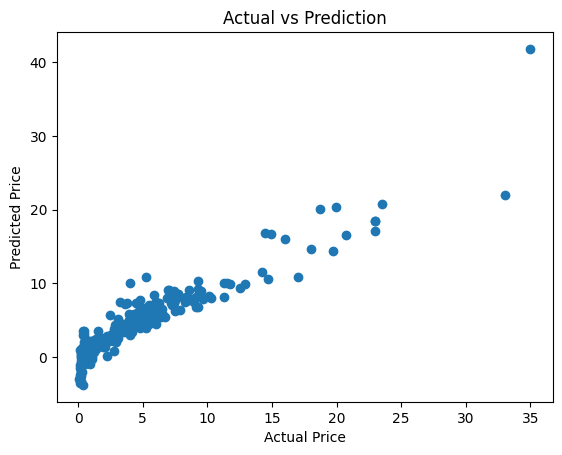

In [23]:
plt.scatter(y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Prediction")
plt.show()

In [24]:
# test data
X_test_prediction = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(X_test_prediction, y_test)
print(error_score)

0.8062199941176358


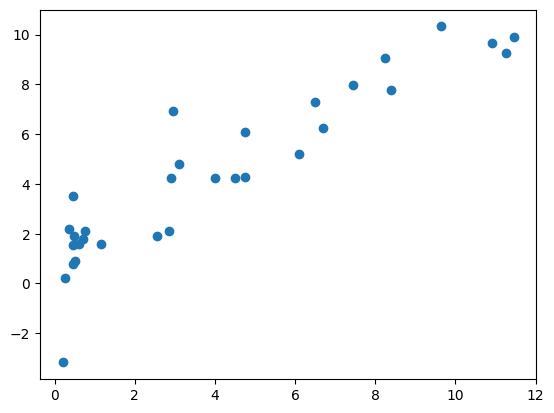

In [25]:
plt.scatter(y_test, X_test_prediction)
plt.show()

# Lasso

In [26]:
lin_reg_model = Lasso()

In [27]:
lin_reg_model.fit(X_train, y_train)

Lasso()

## Evaluation

In [28]:
# training data
X_train_prediction = lin_reg_model.predict(X_train)

# R square error
error_score = metrics.r2_score(X_train_prediction, y_train)
print("R square error:", error_score)

R square error: 0.798459024070425


## Visualize prediction

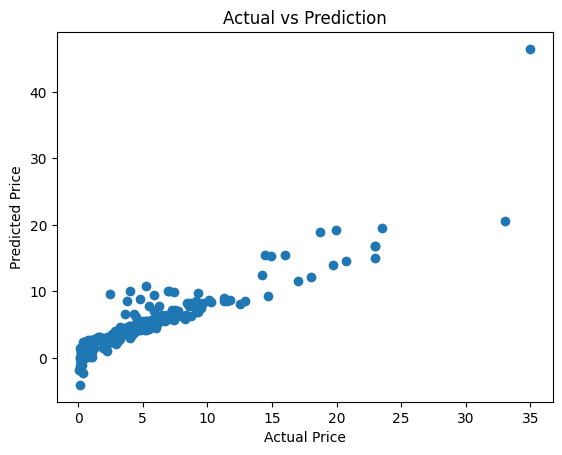

In [29]:
plt.scatter(y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Prediction")
plt.show()

In [30]:
# test data
X_test_prediction = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(X_test_prediction, y_test)
print(error_score)

0.7711110403265475


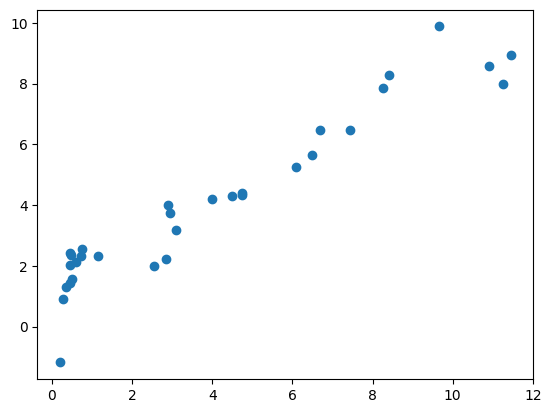

In [31]:
plt.scatter(y_test, X_test_prediction)
plt.show()